In [ ]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Netflix Catalog (2019)

In [ ]:
#read data
df_netflix_2019 = pd.read_csv('netflix_titles.csv')

In [ ]:
df_netflix_2019.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Overview

In [ ]:
df_netflix_2019.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [ ]:
#overview
df_netflix_2019.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df_netflix_2019.shape

(8807, 12)

### Identifying Missing Data

In [ ]:
# number of rows missing in each column
# df_netflix_2019.isnull().sum()
# % of rows missing in each column
for column in df_netflix_2019.columns:
    percentage = df_netflix_2019[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


In [ ]:
df_netflix_2019.isnull().mean().sort_values(ascending=False)

director        0.299080
country         0.094357
cast            0.093675
date_added      0.001135
rating          0.000454
duration        0.000341
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
listed_in       0.000000
description     0.000000
dtype: float64

### Dealing with missing data

In [ ]:
#1. drop
#drop column
df_netflix_2019.drop('director', axis=1)
#drop row
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)
#~ + .isnull()
df_netflix_2019[~df_netflix_2019['director'].isnull()]
#dropna()
df_netflix_2019.dropna(subset=['director'])

#2. use median, mean (numeric data) or mode (categorical data)
df_netflix_2019[df_netflix_2019['rating'].isnull()]
mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)
#3. replace with arbitrary number or text
df_netflix_2019['duration'].fillna(0, inplace=True)

# backward, forward ->df.fillna(method='bfill') , df.fillna(method='ffill')

In [ ]:
mode = ''.join(df_netflix_2019['rating'].mode())
mode

'TV-MA'

In [ ]:
#drop column
df1 = df_netflix_2019.drop('director', axis=1)
df1.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
no_director

Int64Index([   1,    3,    4,   10,   14,   15,   17,   19,   21,   25,
            ...
            8775, 8780, 8783, 8784, 8785, 8795, 8796, 8797, 8800, 8803],
           dtype='int64', length=2634)

In [ ]:
df2 = df_netflix_2019.drop(no_director, axis=0)
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df1.shape

(8807, 11)

In [ ]:
print(df_netflix_2019[~df_netflix_2019['director'].isnull()])


     show_id     type                             title  \
0         s1    Movie              Dick Johnson Is Dead   
2         s3  TV Show                         Ganglands   
5         s6  TV Show                     Midnight Mass   
6         s7    Movie  My Little Pony: A New Generation   
7         s8    Movie                           Sankofa   
...      ...      ...                               ...   
8801   s8802    Movie                           Zinzana   
8802   s8803    Movie                            Zodiac   
8804   s8805    Movie                        Zombieland   
8805   s8806    Movie                              Zoom   
8806   s8807    Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
2                   Julien Leclercq   
5                     Mike Flanagan   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
...                             ...   
8801              

### Finding Outliers

#### Numeric Data

In [ ]:
#creating column (extract)
df_movie = df_netflix_2019[df_netflix_2019['type']=='Movie']
df_movie['duration'].isnull().sum()



3

In [ ]:
mode_duration = ''.join(df_movie['duration'].mode())
mode_duration

'90 min'

In [ ]:
df_movie.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
df_movie['duration'].fillna(mode_duration, inplace =True)
df_movie.isnull().sum()

<ipython-input-47-df28729fa8b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'].fillna(mode_duration, inplace =True)


show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(int))
df_movie.loc[:,['show_id','duration','minute']]

,show_id,duration,minute
0,s1,90 min,90
6,s7,91 min,91
7,s8,125 min,125
9,s10,104 min,104
12,s13,127 min,127
...,...,...,...
8801,s8802,96 min,96
8802,s8803,158 min,158
8804,s8805,88 min,88
8805,s8806,88 min,88


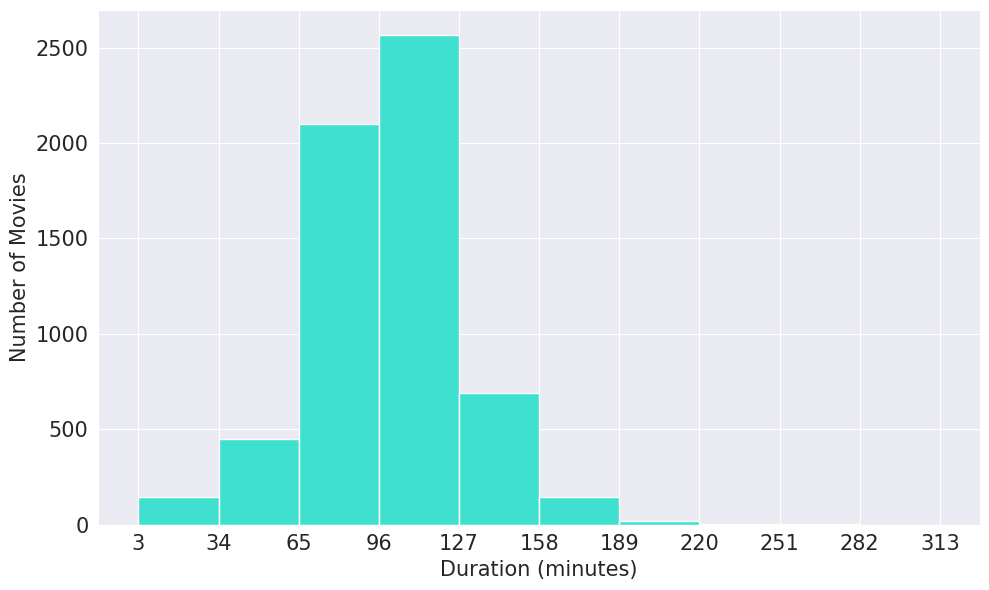

In [ ]:
# Histogram
# stylish: lining up  ticks  with the histogram bars
min_minute, max_minute = df_movie['minute'].min(), df_movie['minute'].max()
minbin, maxbin = math.floor(min_minute), math.ceil(max_minute)
gap = maxbin - minbin
#choose number of beens
bins = 10
width = math.ceil(gap/bins)

bins = np.arange(minbin,maxbin+width, width)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df_movie['minute'], bins=bins, color='turquoise')

fig.set_size_inches(10, 6)
ax.set_xlabel('Duration (minutes)', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
plt.xticks(bins, fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()
# fig.savefig('histogram_cleaning.png')

#simple
# fig, ax = plt.subplots(nrows=1, ncols=1)
# plt.hist(x=df_movie['minute'])
# fig.tight_layout()

In [ ]:
df_movie['minute'].mean()

99.57250040776383

In [ ]:
df_movie['minute'].std()

28.28446308721332

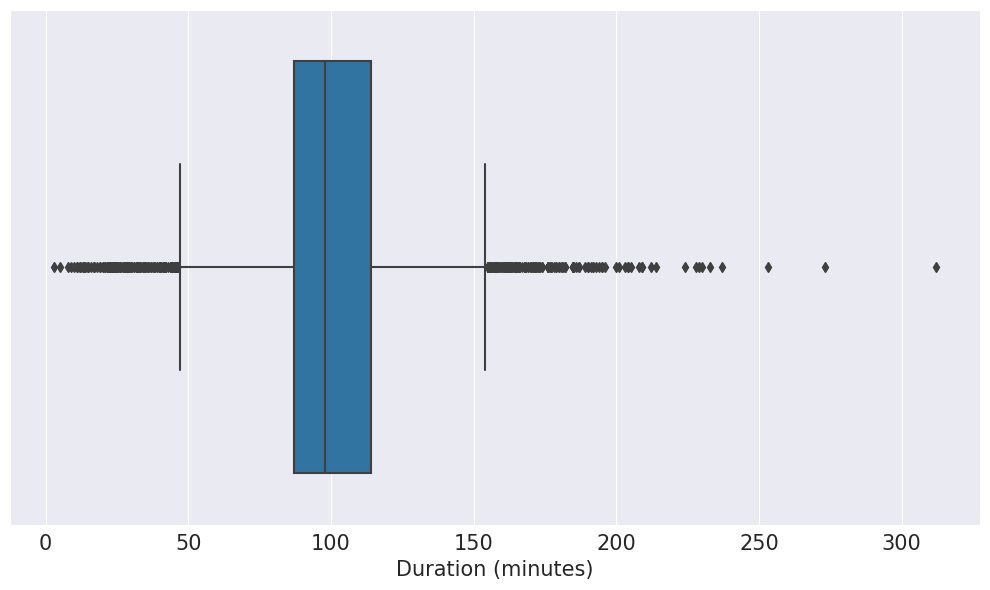

In [ ]:
#boxplot
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=df_movie['minute'])
ax.set_xlabel('Duration (minutes)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('boxplot_cleaning.png')

# fig, ax = plt.subplots(nrows=1, ncols=1)
# ax = sns.boxplot(x=df_movie['minute'])
# fig.tight_layout()

In [ ]:
#first boxplot
# import plotly.graph_objects as go
# from plotly.offline import iplot, init_notebook_mode

# fig = go.Figure()
# fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
# iplot(fig)

In [ ]:
#overview descriptive statitics
df_movie['minute'].describe()

count    4265.000000
mean       99.100821
std        28.074857
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: minute, dtype: float64

#### Categorical data

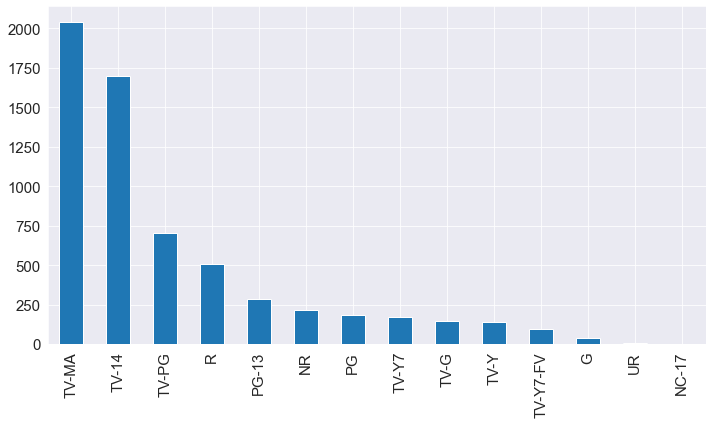

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
fig = df_netflix_2019['rating'].value_counts().plot.bar().get_figure()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
fig.savefig('bar_cleaning')

### Dealing with Outliers

In [ ]:
#outliers
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>=43) & (df_movie['minute']<=158)]

In [ ]:
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8639,s8640,Movie,Tukaram,Chandrakant Kulkarni,"Jitendra Joshi, Prateeksha Lonkar, Sharad Ponk...",India,"February 15, 2018",2012,TV-PG,162 min,"Dramas, Faith & Spirituality, International Mo...",A child whose innocence and devotion set him a...,162
8657,s8658,Movie,Under an Arctic Sky,Chris Burkard,"Chris Burkard, Sam Hammer, Heidar Logi, Elli T...",United States,"December 15, 2017",2017,TV-14,40 min,"Action & Adventure, Documentaries, Sports Movies",Six fearless surfers travel to the north coast...,40
8707,s8708,Movie,"We, the Marines",Greg MacGillivray,NaN,United States,"July 1, 2018",2017,TV-PG,38 min,"Documentaries, International Movies",Narrated by actor and former Marine Gene Hackm...,38
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191


In [ ]:
df_movie1 = df_movie[(df_movie['minute']>=43) & (df_movie['minute']<=158)]

In [ ]:
df_movie.shape

(6131, 13)

In [ ]:
df_movie1.shape

(5773, 13)

In [ ]:
df_movie1.isnull().sum()

show_id           0
type              0
title             0
director        138
cast            418
country         367
date_added        0
release_year      0
rating            1
duration          0
listed_in         0
description       0
minute            0
dtype: int64

In [ ]:
df_movie1 = df_movie1[~df_movie1['director'].isnull()]
df_movie1 = df_movie1[~df_movie1['country'].isnull()]
df_movie1 = df_movie1[~df_movie1['cast'].isnull()]
df_movie1 = df_movie1[~df_movie1['rating'].isnull()]

In [ ]:
df_movie1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
minute          0
dtype: int64

### Inconsistent Data 1

In [ ]:
#inconsistent capitalization
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:x.lower())
# Remove strings in columns (sub, replace) remove punctuation
df_netflix_2019['title'] = df_netflix_2019['title'].apply(lambda x:re.sub('[^\w\s]','',x))
#unnecessary data
df_netflix_2019 = df_netflix_2019.drop_duplicates()
#droping tiltes from the same type (movie or tv) to avoid further problems (34 out)
df_netflix_2019.drop_duplicates(['title','type'], keep='last', inplace=True)

In [ ]:
df_netflix_2019.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,blood water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Netflix Originals (until 2020)

### Inconsitent Data 2

In [ ]:
df_netflix_originals = pd.read_csv('netflix_originals.csv')
#inconsintent column names
df_netflix_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)
# inconsistent dtypes (data must be same type before merging)
df_netflix_originals = df_netflix_originals.astype({"release_year": int})

In [ ]:
# example: Dealing with inconsistent names e.g. "New York" vs "NY"
from fuzzywuzzy import process, fuzz
states = ['New York', 'California', 'Washington', 'Hawaii']
df_states = pd.DataFrame({'states':['NY', 'CA', 'Washington DC', 'Hawai']})
df_states[['match', 'score']] = df_states['states'].apply(lambda x:process.extractOne(x, states, scorer=fuzz.token_sort_ratio)).apply(pd.Series)
df_states.value_counts()

states         match       score
CA             California  33       1
Hawai          Hawaii      91       1
NY             New York    40       1
Washington DC  Washington  87       1
dtype: int64

### Text Normalization

In [ ]:
#inconsistent capitalization
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.lower())
df_netflix_originals['title'] = df_netflix_originals['title'].str.lower()
#clean leading and trailing spaces
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:x.strip())
df_netflix_originals['title'] = df_netflix_originals['title'].str.strip()
# remove punctuation: clean characters other than word or spaces
df_netflix_originals['title'] = df_netflix_originals['title'].apply(lambda x:re.sub('[^\w\s]','',x))
df_netflix_originals['title'].replace('[^\w\s]', '', regex=True, inplace=True)

### Final Netflix DataFrame

In [ ]:
# we want to identify which movies are netflix originals and which only belong to the catalog so we do an outer join to give 'Catalog' value to all the rows
# that are only in the "df_netflix_2019" dataset
df_netflix = pd.merge(df_netflix_originals, df_netflix_2019, on=['title', 'type', 'release_year'],
                           how='outer')
df_netflix['original'].fillna('Catalog', inplace=True)
#drop_duplicates: data duplicated because of disagreement in releaase_year
df_netflix.drop_duplicates(['title'], keep='first', inplace=True)

In [ ]:
df_netflix[['original', 'type']].value_counts()

original  type   
Catalog   Movie      3705
          TV Show    1439
Netflix   TV Show    1009
          Movie       504
dtype: int64